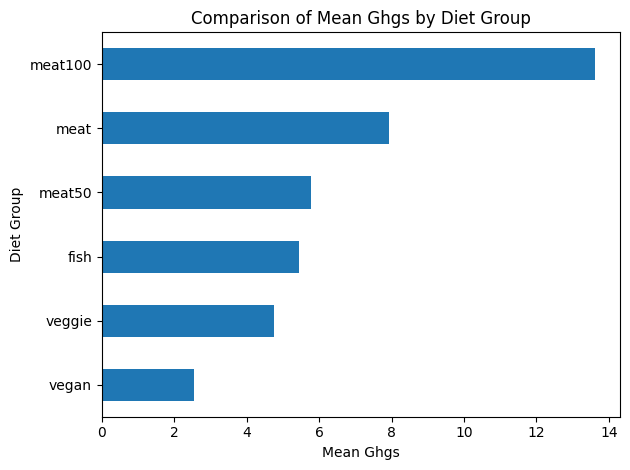

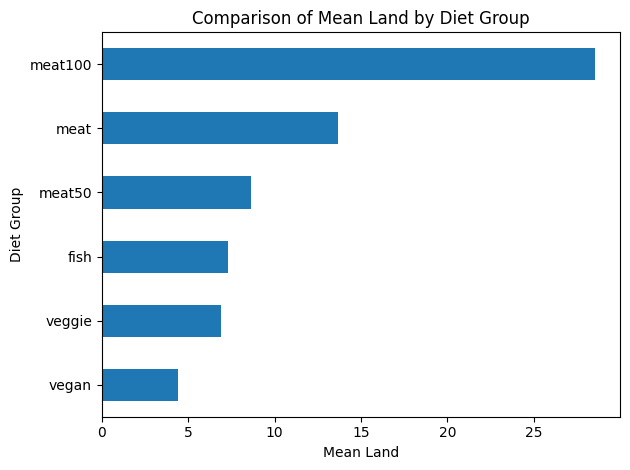

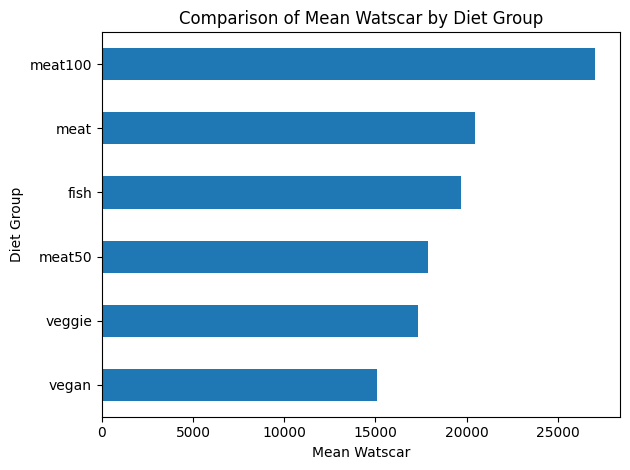

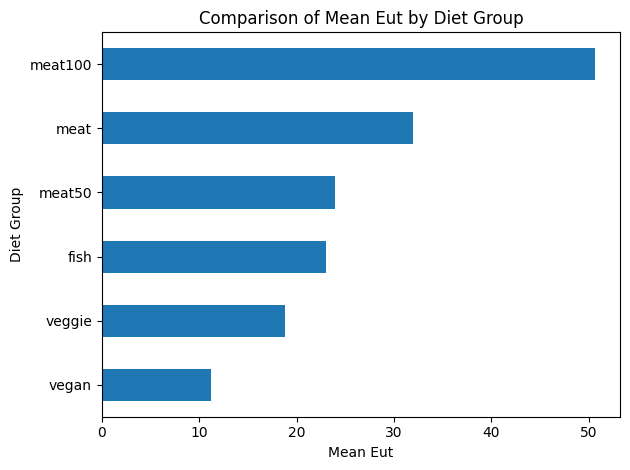

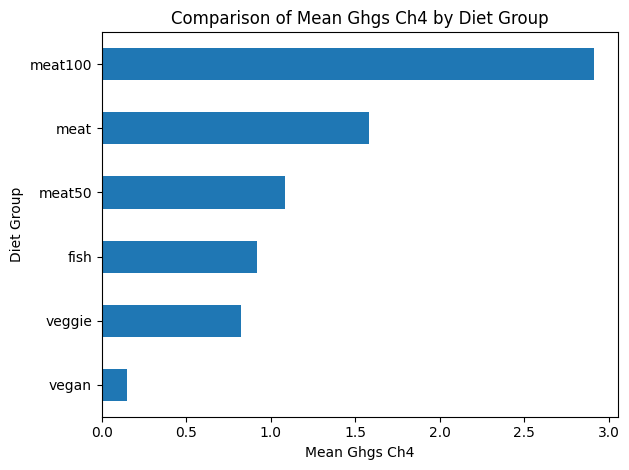

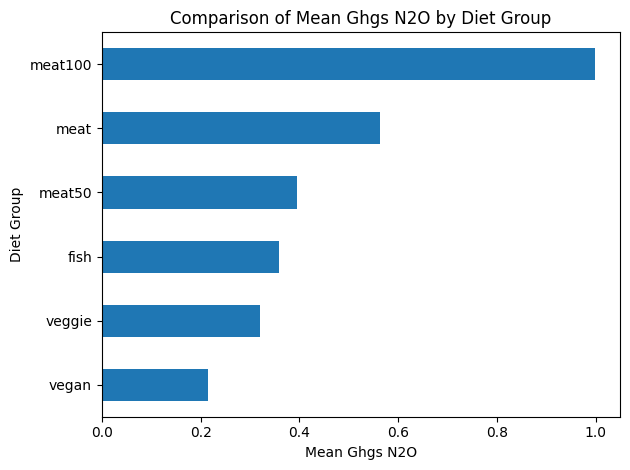

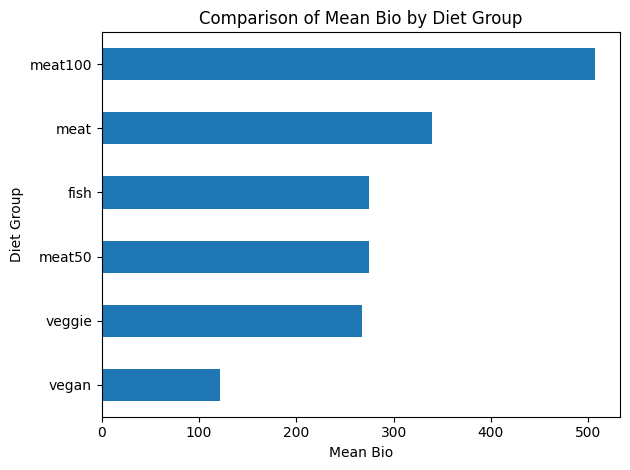

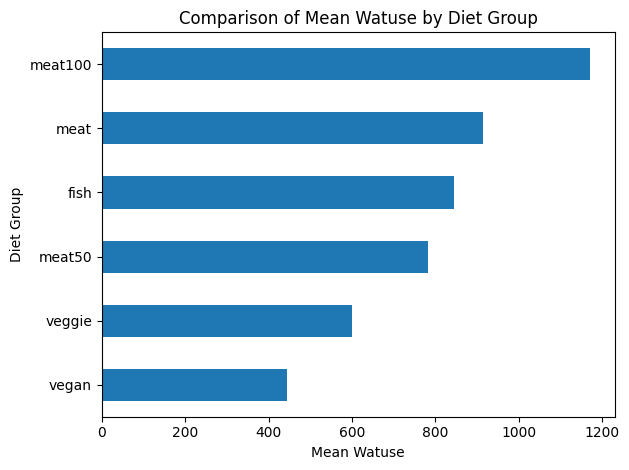

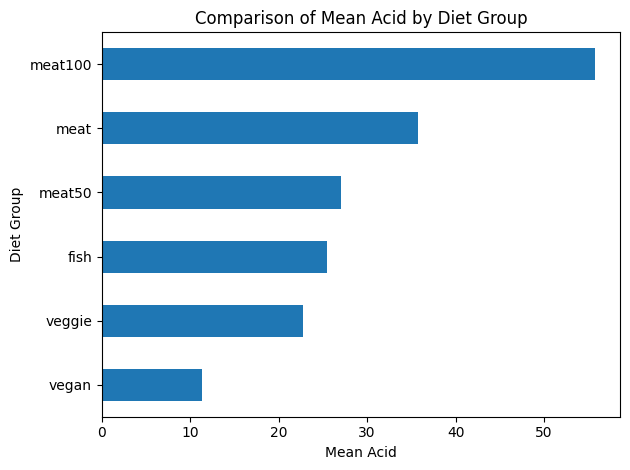

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

# load the data
file_path = 'Results_21MAR2022_nokcaladjust.csv'
df = pd.read_csv(file_path)

diet_influence = df.groupby('diet_group').agg({
    'mean_ghgs': 'mean',
    'mean_land': 'mean',
    'mean_watscar': 'mean',
    'mean_eut': 'mean',
    'mean_ghgs_ch4': 'mean',
    'mean_ghgs_n2o': 'mean',
    'mean_bio': 'mean',
    'mean_watuse': 'mean',
    'mean_acid': 'mean'
}).reset_index()

diet_influence_plot = diet_influence.set_index('diet_group')

metrics = ['mean_ghgs', 'mean_land', 'mean_watscar', 'mean_eut', 'mean_ghgs_ch4', 'mean_ghgs_n2o', 'mean_bio',
           'mean_watuse', 'mean_acid']

for metric in metrics:
    plt.figure()
    diet_influence_plot[metric].sort_values().plot(kind='barh')
    plt.xlabel(metric.replace('_', ' ').title())
    plt.ylabel('Diet Group')
    plt.title(f'Comparison of {metric.replace("_", " ").title()} by Diet Group')
    plt.tight_layout()
    plt.savefig(metric.replace('_', ' ').title() + '.png')
    plt.show()

In [3]:
# Disparity between vegan and meat100 diets
vegan_impact = diet_influence_plot.loc['vegan']
meat100_impact = diet_influence_plot.loc['meat100']
disparity = (meat100_impact - vegan_impact) / vegan_impact * 100  # percentage difference
disparity_metrics = disparity[metrics]
print("Disparity between meat100 and vegan diets (in %):")
print(disparity_metrics)

Disparity between meat100 and vegan diets (in %):
mean_ghgs         434.090069
mean_land         544.094684
mean_watscar       79.407763
mean_eut          352.352165
mean_ghgs_ch4    1855.523862
mean_ghgs_n2o     366.701618
mean_bio          315.817184
mean_watuse       164.359303
mean_acid         394.610207
dtype: float64


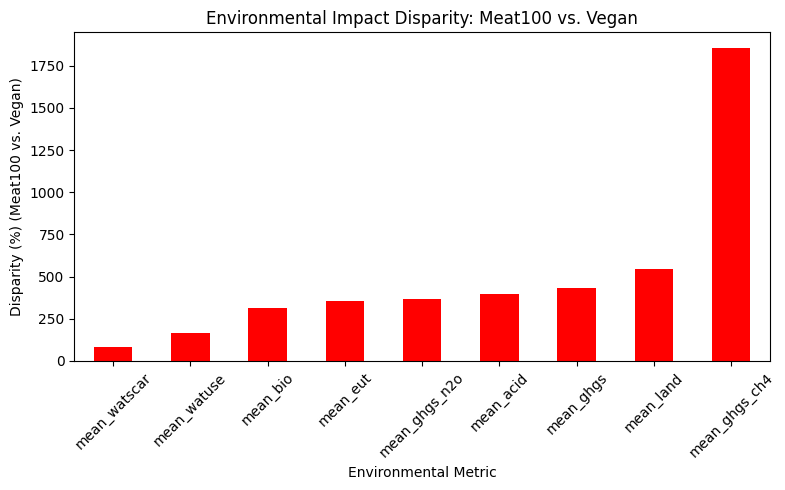

In [4]:
import matplotlib.pyplot as plt

# Plot disparity as a bar chart
plt.figure(figsize=(8,5))
disparity_metrics.sort_values().plot(kind='bar', color='red')

# Labels and title
plt.ylabel('Disparity (%) (Meat100 vs. Vegan)')
plt.xlabel('Environmental Metric')
plt.title('Environmental Impact Disparity: Meat100 vs. Vegan')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Save the plot (optional)
plt.savefig('Disparity_Meat100_vs_Vegan.png')

# Show the plot
plt.show()